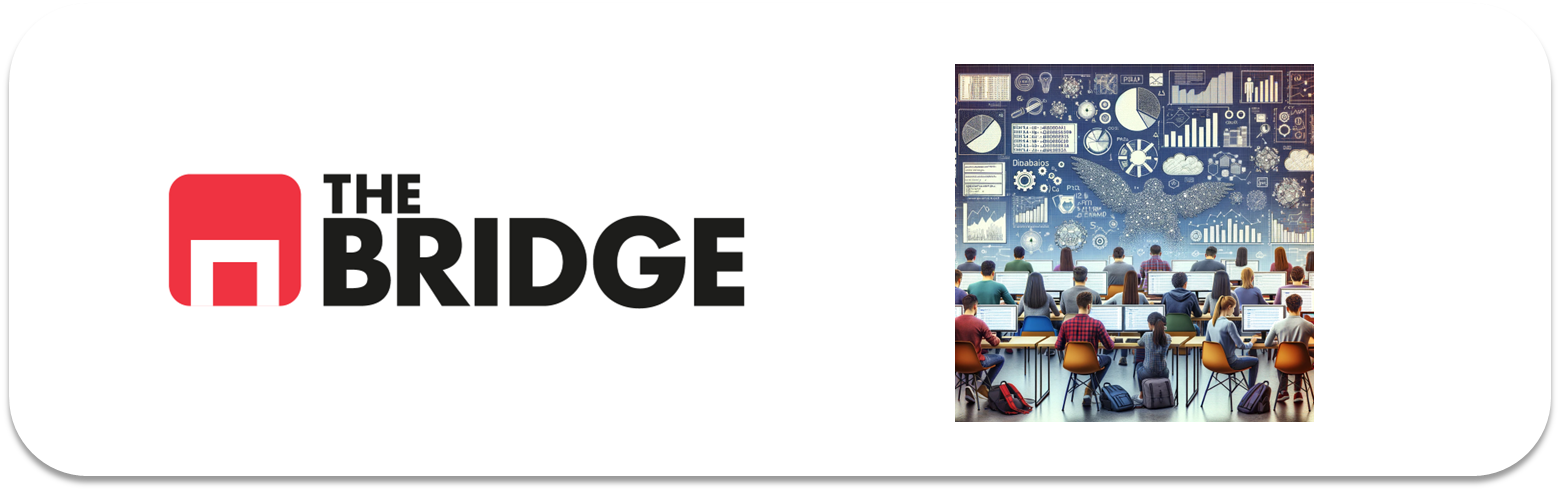

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularizaci√≥n**

* La pr√°ctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicci√≥n de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendr√°s que descar los directorios de im√°genes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesi√≥n en vivo para que punt√∫e adecuadamente.  
* Recuerda tambi√©n que no es necesario que est√© perfecta, s√≥lo es necesario que se vea el esfuerzo. 
* Esta pr√°ctica se resolver√° en la sesi√≥n en vivo correspondiente y la soluci√≥n se publicar√° en el repo del curso. 

### Modelo de Regresi√≥n Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del √°rea metropolitana de Boston dadas las caracter√≠sticas de las mismas. S√≠, es parecido pero no igual a lo que hemos venido haciendo.

Aqu√≠ tienes una descripci√≥n de las variables del dataset, del que tendr√°s que decidir el target:  

***CRIM:*** Tasa de criminalidad per c√°pita por ciudad  
***ZN:*** Proporci√≥n de terreno residencial destinado a lotes de m√°s de 25,000 pies cuadrados  
***INDUS:*** Proporci√≥n de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del r√≠o Charles (= 1 si el sector limita con el r√≠o; 0 en caso contrario)  
***NOX:*** Concentraci√≥n de √≥xidos de nitr√≥geno (partes por 10 millones)  
***RM:*** N√∫mero promedio de habitaciones por vivienda  
***AGE:*** Proporci√≥n de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** √çndice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relaci√≥n alumno-maestro por ciudad  
***LSTAT:*** % de poblaci√≥n de estatus socioecon√≥mico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de d√≥lares  

### Indicaciones

A continuaci√≥n tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las pr√°ctica obligatorias dejar√°n de ser mayormente guiadas por ejercicios y ser√°n m√°s de libre desarrollo, aunque con objetivos espec√≠ficos, claros y determinados. 

En concreto se pide hacer un modelo de regresi√≥n lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularizaci√≥n de las conocidas, testando por lo menos 3 valores diferentes de hiperpar√°metros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Est√° limpio y no necesitar√°s completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gr√°fica para ver la idoneidad de hacer un modelo de regresi√≥n.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qu√©.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresi√≥n lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Eval√∫a tu modelo. Haz un peque√±o assesmente de su generabilidad. Compara gr√°ficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperpar√°metros del modelo de regularizaci√≥n.
10. Expresa tus conclusiones, en concreto ¬øcon qu√© modelo te quedar√≠as?¬øpor qu√©?



In [ ]:
#1. Carga del dataset
import pandas as pd

df = pd.read_csv("data/hard_to_find/obligatoria_hard.csv", sep="|")
df.columns = df.columns.str.strip()

# Vista previa
df.head()


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO  LSTAT  MEDV  
0     15.3   4.98  24.0  
1     17.8   9.14  21.6  
2     17.8   4.03  34.7  
3     18.7   2.94  33.4  
4     18.7   5.33  36.2

Text(0.5, 1.0, 'Distribuci√≥n del valor medio de las viviendas (MEDV)')

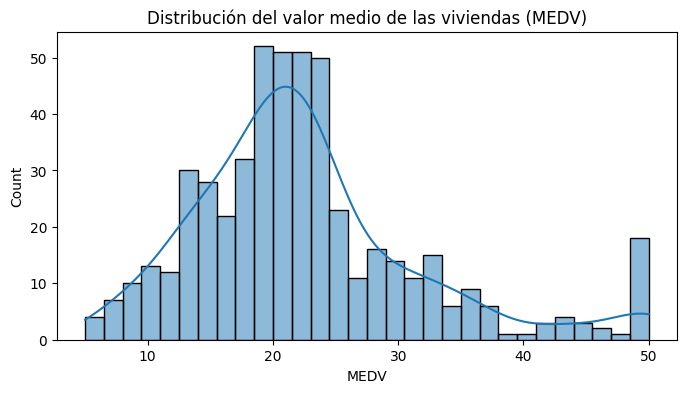

In [ ]:
#2. An√°lisis de la variable target
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df["MEDV"], kde=True, bins=30)
plt.title("Distribuci√≥n del valor medio de las viviendas (MEDV)")


In [ ]:
#3+4. Divisi√≥n entre train y test
from sklearn.model_selection import train_test_split

X = df.drop("MEDV", axis=1)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

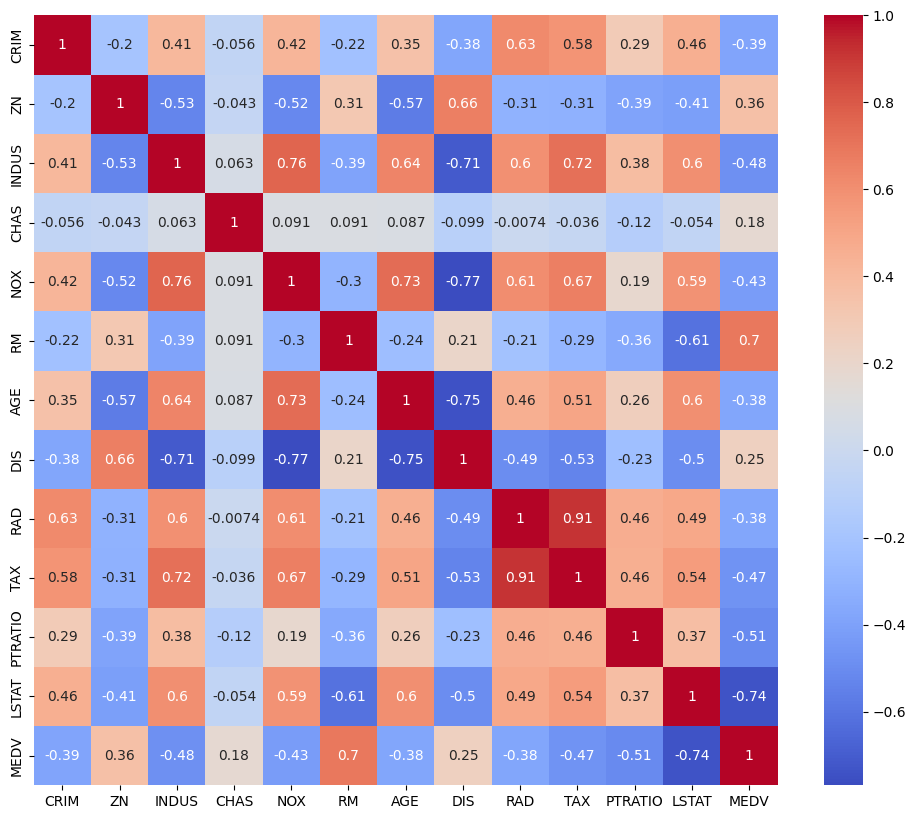

In [ ]:
# 5. Mini EDA y selecci√≥n de features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

‚úÖ Variables m√°s correlacionadas con MEDV (target):

üìà Correlaci√≥n positiva (m√°s alto = m√°s caro):

RM ‚Üí +0.70 ‚Üí M√°s habitaciones ‚Üí M√°s valor

ZN ‚Üí +0.36 ‚Üí Zonas residenciales grandes

CHAS ‚Üí +0.18 ‚Üí R√≠o Charles (leve impacto)

üìâ Correlaci√≥n negativa (m√°s alto = m√°s barato):

LSTAT ‚Üí ‚Äì0.74 ‚Üí Mayor % clase baja ‚Üí Menor precio

PTRATIO ‚Üí ‚Äì0.51 ‚Üí M√°s alumnos por maestro ‚Üí Menor calidad

TAX ‚Üí ‚Äì0.47

INDUS ‚Üí ‚Äì0.38

NOX ‚Üí ‚Äì0.43

CRIM ‚Üí ‚Äì0.39

RAD ‚Üí ‚Äì0.38

AGE ‚Üí ‚Äì0.38

In [15]:
features = ['RM', 'LSTAT', 'PTRATIO', 'TAX', 'CRIM', 'NOX']
X = df[features]


In [16]:
# 6. Trata las variables para que funcionen lo mejor posible en el modelo
# NORMALIZACI√ìN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajustamos el escalador solo con los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# 7. Construcci√≥n del modelo de regresi√≥n lineal
from sklearn.linear_model import LinearRegression

# Inicializamos y entrenamos el modelo
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Hacemos predicciones
y_pred = lr.predict(X_test_scaled)


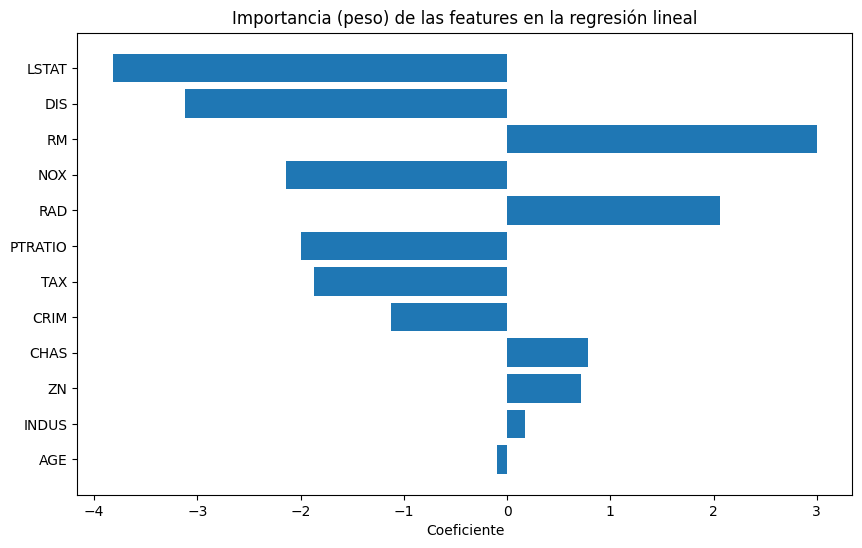

In [22]:
# 8. Importancia de features 
# Guardamos los coeficientes en un DataFrame
features = X_train.columns  # Aseg√∫rate de que sea un DataFrame, no un array

coefs = pd.DataFrame({
    "Feature": features,
    "Coef": lr.coef_
}).sort_values(by="Coef", key=abs, ascending=False)

# Gr√°fico de barras
plt.figure(figsize=(10, 6))
plt.barh(coefs["Feature"], coefs["Coef"])
plt.title("Importancia (peso) de las features en la regresi√≥n lineal")
plt.xlabel("Coeficiente")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# 9. Evaluaci√≥n del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R¬≤:   {r2:.4f}")


MAE:  3.11
MSE:  22.78
RMSE: 4.77
R¬≤:   0.6894


MAE: 3.11 ‚Üí En promedio, se equivoca unos 3.100 $k$ por casa (es decir, 3.110 $).

RMSE: 4.77 ‚Üí Penaliza m√°s los errores grandes. Un RMSE menor de 5 est√° bastante bien en este contexto.

R¬≤: 0.6894 ‚Üí El modelo explica casi un 69% de la variabilidad de los precios. No est√° mal, pero podr√≠a mejorar con regularizaci√≥n.

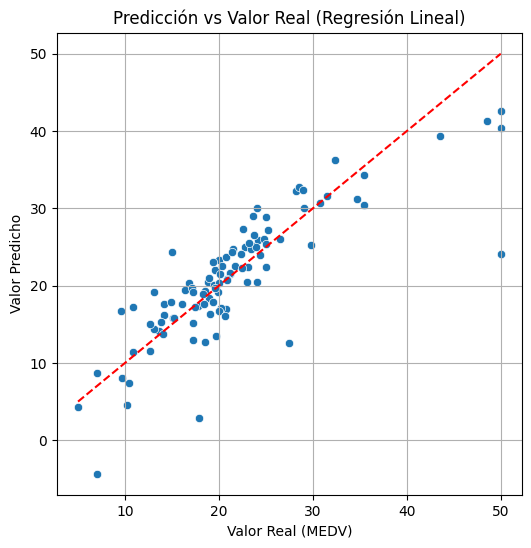

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valor Real (MEDV)")
plt.ylabel("Valor Predicho")
plt.title("Predicci√≥n vs Valor Real (Regresi√≥n Lineal)")
plt.grid(True)
plt.show()
